In [1]:
dataset = "cifar10"
algorithm = "crown ibp"

### 1. Load Dataset

In [2]:
from art.utils import load_cifar10
import numpy as np

(_x1, _y1), (_x2, _y2), _min, _max = load_cifar10()
x = np.concatenate((_x1, _x2))
y = np.concatenate((_y1, _y2))

# Swap axes to PyTorch's NCHW format
x = np.transpose(x, (0, 3, 1, 2)).astype(np.float32)

target_train_size = 2500
target_test_size = 2500
x_target_train = x[:target_train_size]
y_target_train = y[:target_train_size]
x_target_test = x[target_train_size:target_train_size+target_test_size]
y_target_test = y[target_train_size:target_train_size+target_test_size]

### 2. Define Target Model

In [3]:
from torch import nn
from torchsummary import summary
import math

def cifar_model(): 
    model = nn.Sequential(
        nn.Conv2d(3, 16, 4, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(16, 32, 4, stride=2, padding=1),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(32*8*8,100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
            m.weight.data.normal_(0, math.sqrt(2. / n))
            m.bias.data.zero_()
    return model

summary(cifar_model(), input_size=x_target_train[0].shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 16, 16]             784
              ReLU-2           [-1, 16, 16, 16]               0
            Conv2d-3             [-1, 32, 8, 8]           8,224
              ReLU-4             [-1, 32, 8, 8]               0
           Flatten-5                 [-1, 2048]               0
            Linear-6                  [-1, 100]         204,900
              ReLU-7                  [-1, 100]               0
            Linear-8                   [-1, 10]           1,010
Total params: 214,918
Trainable params: 214,918
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.11
Params size (MB): 0.82
Estimated Total Size (MB): 0.94
----------------------------------------------------------------


### 3. Train Target Model

In [4]:
! python auto_LiRPA/examples/vision/cifar_training.py

INFO     17:15:15     Namespace(batch_size=64, bound_opts=None, bound_type='CROWN-IBP', clip_grad_norm=8.0, data='CIFAR', device='cpu', eps=0.03137254901960784, load='', lr=0.0005, lr_decay_milestones=[70, 85], lr_decay_rate=0.1, model='cifar_model', no_loss_fusion=False, norm=2, num_epochs=100, scheduler_name='SmoothedScheduler', scheduler_opts='start=10,length=61,mid=0.4', seed=100, verify=False)
Files already downloaded and verified
Files already downloaded and verified
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[WARN] Cannot find rule for <class 'models.feedforward.Flatten'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.Sequential'>. Treat it as zero Macs and zero Params.
INFO     17:15:27     macs: 1865680.0, params: 214918.0
INFO     17:15:27 

INFO     17:19:01     [19:  40]: eps=0.000125182632 CE=0.0000 grad_norm=5.1099 Loss=1.2807 Robust_CE=1.2807 Time=0.0853
INFO     17:19:01     Epoch time: 8.0152, Total time: 122.6062
INFO     17:19:01     Evaluating...
INFO     17:19:07     [19:  40]: eps=0.000125182632 CE=1.6096 Err=0.5676 Loss=1.6987 Robust_CE=1.6987 Verified_Err=0.6072 Time=0.0207
INFO     17:19:07     Epoch 20, learning rate [0.0005]
INFO     17:19:15     [20:  40]: eps=0.000183446984 CE=0.0000 grad_norm=5.9040 Loss=1.2764 Robust_CE=1.2764 Time=0.0942
INFO     17:19:15     Epoch time: 8.9074, Total time: 131.5136
INFO     17:19:15     Evaluating...
INFO     17:19:21     [20:  40]: eps=0.000183446984 CE=1.6343 Err=0.5720 Loss=1.7723 Robust_CE=1.7723 Verified_Err=0.6264 Time=0.0184
INFO     17:19:21     Epoch 21, learning rate [0.0005]
INFO     17:19:29     [21:  40]: eps=0.000260012693 CE=0.0000 grad_norm=6.5235 Loss=1.2558 Robust_CE=1.2558 Time=0.0764
INFO     17:19:29     Epoch time: 7.6271, Total time: 139.1407
I

INFO     17:23:30     [39:  40]: eps=0.008577857372 CE=1.6535 Err=0.5832 Loss=2.4296 Robust_CE=2.4296 Verified_Err=0.7876 Time=0.0198
INFO     17:23:30     Epoch 40, learning rate [0.0005]
INFO     17:23:38     [40:  40]: eps=0.009312577490 CE=0.0000 grad_norm=2.4444 Loss=1.8655 Robust_CE=1.8655 Time=0.0829
INFO     17:23:38     Epoch time: 8.1071, Total time: 286.3137
INFO     17:23:38     Evaluating...
INFO     17:23:44     [40:  40]: eps=0.009312577490 CE=1.6638 Err=0.5900 Loss=2.4274 Robust_CE=2.4274 Verified_Err=0.7880 Time=0.0211
INFO     17:23:44     Epoch 41, learning rate [0.0005]
INFO     17:23:52     [41:  40]: eps=0.010047297608 CE=0.0000 grad_norm=2.6319 Loss=1.8904 Robust_CE=1.8904 Time=0.0851
INFO     17:23:52     Epoch time: 8.4869, Total time: 294.8005
INFO     17:23:52     Evaluating...
INFO     17:23:58     [41:  40]: eps=0.010047297608 CE=1.6527 Err=0.5880 Loss=2.4239 Robust_CE=2.4239 Verified_Err=0.7772 Time=0.0216
INFO     17:23:58     Epoch 42, learning rate [0.0

INFO     17:27:39     [60:  40]: eps=0.024006979841 CE=0.0000 grad_norm=2.3582 Loss=3.0521 Robust_CE=3.0521 Time=0.0549
INFO     17:27:39     Epoch time: 5.8974, Total time: 427.9678
INFO     17:27:39     Evaluating...
INFO     17:27:43     [60:  40]: eps=0.024006979841 CE=2.4422 Err=0.6460 Loss=3.5363 Robust_CE=3.5363 Verified_Err=0.7664 Time=0.0131
INFO     17:27:43     Epoch 61, learning rate [0.0005]
INFO     17:27:49     [61:  40]: eps=0.024741699959 CE=0.0000 grad_norm=2.4560 Loss=3.1521 Robust_CE=3.1521 Time=0.0552
INFO     17:27:49     Epoch time: 5.8529, Total time: 433.8207
INFO     17:27:49     Evaluating...
INFO     17:27:53     [61:  40]: eps=0.024741699959 CE=2.4828 Err=0.6532 Loss=3.5680 Robust_CE=3.5680 Verified_Err=0.7668 Time=0.0129
INFO     17:27:53     Epoch 62, learning rate [0.0005]
INFO     17:28:00     [62:  40]: eps=0.025476420076 CE=0.0000 grad_norm=2.6698 Loss=3.3487 Robust_CE=3.3487 Time=0.0753
INFO     17:28:00     Epoch time: 6.7638, Total time: 440.5845
I

INFO     17:31:01     [80:  40]: eps=0.031372549020 CE=1.8580 Err=0.6848 Loss=2.1728 Robust_CE=2.1728 Verified_Err=0.8128 Time=0.0133
INFO     17:31:01     Epoch 81, learning rate [5e-05]
INFO     17:31:05     [81:  40]: eps=0.031372549020 CE=0.0000 grad_norm=2.1078 Loss=2.0550 Robust_CE=2.0550 Time=0.0237
INFO     17:31:05     Epoch time: 4.6103, Total time: 543.1760
INFO     17:31:05     Evaluating...
INFO     17:31:09     [81:  40]: eps=0.031372549020 CE=1.8574 Err=0.6816 Loss=2.1630 Robust_CE=2.1630 Verified_Err=0.8116 Time=0.0139
INFO     17:31:09     Epoch 82, learning rate [5e-05]
INFO     17:31:14     [82:  40]: eps=0.031372549020 CE=0.0000 grad_norm=2.1297 Loss=2.0480 Robust_CE=2.0480 Time=0.0254
INFO     17:31:14     Epoch time: 4.8215, Total time: 547.9975
INFO     17:31:14     Evaluating...
INFO     17:31:19     [82:  40]: eps=0.031372549020 CE=1.8528 Err=0.6804 Loss=2.1592 Robust_CE=2.1592 Verified_Err=0.8064 Time=0.0183
INFO     17:31:19     Epoch 83, learning rate [5e-05

In [12]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

def get_acc(model, x, y):
    _, predictions = torch.max(model(torch.from_numpy(x)), 1)
    acc = np.mean(predictions.detach().numpy() == np.argmax(y, axis=1))
    return acc

model = cifar_model()
model.load_state_dict(torch.load("models/cifar10_crown_ibp.pth", map_location=torch.device('cpu'))['state_dict'])
model.eval()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

print("Train accuracy:", get_acc(model, x_target_train, y_target_train))
print("Test accuracy:", get_acc(model, x_target_test, y_target_test))

Train accuracy: 0.3676
Test accuracy: 0.3308


### 4. Generate Adversarial Examples using HopSkipJump

In [13]:
from art.attacks.evasion import HopSkipJump
from art.estimators.classification.pytorch import PyTorchClassifier
from numpy.random import choice

art_classifier=PyTorchClassifier(
    model=model,
    clip_values=(_min, _max),
    loss=loss_fn,
    optimizer=optimizer,
    input_shape=(3, 32, 32),
    nb_classes=10,
)
attack = HopSkipJump(classifier=art_classifier, norm=2, targeted=False)

train_idx = choice(len(x_target_train), 100)
y_adv_train = y_target_train[train_idx]
x_adv_train = attack.generate(x=x_target_train[train_idx], y=y_adv_train)

test_idx = choice(len(x_target_test), 100)
y_adv_test = y_target_test[test_idx]
x_adv_test = attack.generate(x=x_target_test[test_idx], y=y_adv_test)

HopSkipJump:   0%|          | 0/100 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/100 [00:00<?, ?it/s]

### 5. Measure the Distribution of Distance to Decision Boundary

                0
count  100.000000
mean     1.024536
std      0.986315
min      0.000000
25%      0.106697
50%      0.771034
75%      1.634235
max      3.761666
                0
count  100.000000
mean     1.229705
std      1.236906
min      0.000000
25%      0.204892
50%      0.917901
75%      1.917299
max      6.522482


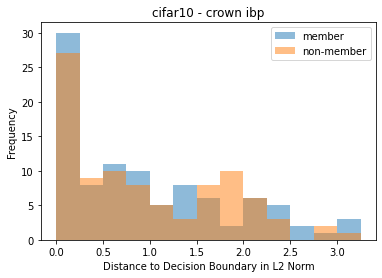

In [17]:
from matplotlib import pyplot as plt
import pandas as pd

def dist(x, x_adv):
    return np.linalg.norm(np.reshape(x_adv - x, [-1]))

dist_train = [dist(x, xa) for (x, xa) in zip(x_target_train[train_idx], x_adv_train)]
dist_test = [dist(x, xa) for (x, xa) in zip(x_target_test[test_idx], x_adv_test)]
print(pd.DataFrame(np.array(dist_train)).describe())
print(pd.DataFrame(np.array(dist_test)).describe())

bins = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25]

plt.hist(dist_train, bins, alpha=0.5, label='member')
plt.hist(dist_test, bins, alpha=0.5, label='non-member')
plt.legend(loc='upper right')
plt.title(f'{dataset} - {algorithm}')
plt.xlabel("Distance to Decision Boundary in L2 Norm")
plt.ylabel("Frequency")
plt.show()

### 6. Measure the Advantage of An Adversary in Label-Only Membership Inference Attacks

[0.   0.01 0.05 0.05 0.07 0.07 0.08 0.08 0.11 0.11 0.14 0.14 0.16 0.16
 0.17 0.17 0.18 0.18 0.21 0.21 0.27 0.27 0.3  0.3  0.31 0.31 0.32 0.32
 0.35 0.35 0.38 0.38 0.39 0.39 0.4  0.4  0.43 0.43 0.45 0.45 0.46 0.46
 0.47 0.47 0.48 0.48 0.51 0.51 0.52 0.52 0.54 0.54 0.56 0.56 0.58 0.58
 0.59 0.59 0.62 0.62 0.64 0.64 0.65 0.65 0.66 0.66 0.7  0.7  0.71 0.71
 0.73 0.73 0.75 0.75 0.79 0.79 0.8  0.8  0.83 0.83 0.85 0.85 0.87 0.87
 0.88 1.  ]
[0.   0.   0.   0.01 0.01 0.02 0.02 0.06 0.06 0.09 0.09 0.15 0.15 0.16
 0.16 0.19 0.19 0.2  0.2  0.21 0.21 0.22 0.22 0.23 0.23 0.24 0.24 0.27
 0.27 0.28 0.28 0.31 0.31 0.32 0.32 0.36 0.36 0.37 0.37 0.38 0.38 0.41
 0.41 0.43 0.43 0.45 0.45 0.47 0.47 0.48 0.48 0.51 0.51 0.54 0.54 0.55
 0.55 0.59 0.59 0.61 0.61 0.63 0.63 0.65 0.65 0.67 0.67 0.68 0.68 0.7
 0.7  0.71 0.71 0.72 0.72 0.73 0.73 0.74 0.74 0.76 0.76 0.79 0.79 0.8
 0.8  1.  ]
[7.5224819e+00 6.5224819e+00 4.0229073e+00 3.7616658e+00 3.5683341e+00
 3.5409808e+00 3.4230766e+00 3.0704174e+00 2.9637496e+0

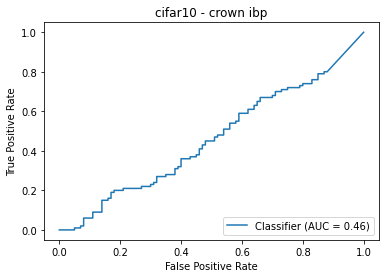

In [18]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve

fpr, tpr, thresholds = roc_curve(
    np.concatenate((np.ones(len(dist_train)), np.zeros(len(dist_test)))),
    dist_train + dist_test
)
print(fpr)
print(tpr)
print(thresholds)

RocCurveDisplay.from_predictions(
    np.concatenate((np.ones(len(dist_train)), np.zeros(len(dist_test)))),
    dist_train + dist_test
)
plt.title(f'{dataset} - {algorithm}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### 7. Measure the Statistical Relationship between Distance to Decision Boundary and Confidence Scores

In [16]:
# from scipy.stats.stats import pearsonr
import scipy

confidence_train = [np.amax(scipy.special.softmax(p)) for p in art_classifier.predict(x_target_train[train_idx])]
confidence_test = [np.amax(scipy.special.softmax(p)) for p in art_classifier.predict(x_target_test[test_idx])]

corr, pvalue = pearsonr(confidence_train, dist_train)
print("train correlation ", corr, pvalue)
corr, pvalue = pearsonr(confidence_test, dist_test)
print("test correlation ", corr, pvalue)

train correlation  0.5833840852903146 1.8966935333512727e-10
test correlation  0.4844610691914139 3.269388176159646e-07
